# TP3 (durée : 3h)

# Reconnaissance d’écriture par réseaux de neurones

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

#  1. Analyse des données

In [3]:
digits = load_digits()

#  Déterminer la dimension D des données et le nombre d’exemple par classe

In [4]:
X = digits.data
y = digits.target
print(X.shape)
print(np.unique(X))


(1797, 64)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


In [5]:
plt.gray()

<Figure size 640x480 with 0 Axes>

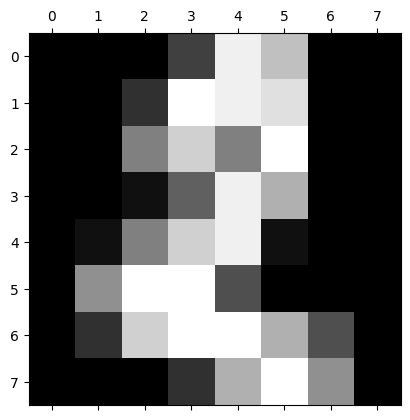

In [6]:
plt.matshow(digits.images[2])
plt.show()

#  b) Séparer une fois pour toutes la base initiale en deux : apprentissage (70%) et test (30%)
(model_selection.train_test_split)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7,random_state=1)

#  2. Apprentissage

# Optimiser la structure du réseau de neurones (nombre de cellules en couche cachée). Étudier l’influence du nombre de neurones cachés sur les taux de reconnaissance en apprentissage et en généralisation (fonction score). Conclure sur l’architecture optimale. Vous pouvez modifier les paramètres en fonction des conclusions tirées au TP2

In [97]:
moyen_train = [] # liste des moyennes pour les 5 train de chaque valeur de c
moyen_test = [] #liste des moyennes pour les 5 test de chaque valeur de c
ecartype_train = [] # liste des ecartypes pour train
ecartype_test = [] # liste des ecartypes pour test
C = range(1,15) # nombre de neurones de la couche cachée

moyen_par_C_test = [] # liste des moyennes pour les 5 test de chaque valeur de c
moyen_par_C_train =[] # liste des moyennes pour les 5 train de chaque valeur de c
# je parcours les 15 valeurs de C
for i in C:
    # je vide mes deux liste après avoir utilisé leur contenu
    moyen_par_C_train.clear()
    moyen_par_C_test.clear()
    # pour chaque valeur de C je j'entraine mon modèle 5 fois
    for j in range(5):
        clf1 = MLPClassifier(hidden_layer_sizes = i, activation = 'tanh', solver = 'adam',batch_size=1, alpha =0,learning_rate = 'adaptive',verbose = 1)
        clf1.fit(X_train,y_train)
        moyen_par_C_train.append(clf1.score(X_train,y_train))
        moyen_par_C_test.append(clf1.score(X_test,y_test))
        
    # je calcule les moyennes pour chaque valeur de C
    moyen_train.append(np.mean(moyen_par_C_train))
    moyen_test.append(np.mean(moyen_par_C_test))
    # Calcul d'ecartype
    ecartype_train.append(np.std(moyen_par_C_train))
    ecartype_test.append(np.std(moyen_par_C_test))
    
#plt.plot(clf2.acc_train)


Iteration 1, loss = 2.36285964
Iteration 2, loss = 2.16868654
Iteration 3, loss = 2.08468674
Iteration 4, loss = 2.03793682
Iteration 5, loss = 2.00439353
Iteration 6, loss = 1.97322290
Iteration 7, loss = 1.95397266
Iteration 8, loss = 1.94462326
Iteration 9, loss = 1.92336827
Iteration 10, loss = 1.90821881
Iteration 11, loss = 1.90291551
Iteration 12, loss = 1.90000903
Iteration 13, loss = 1.88430337
Iteration 14, loss = 1.88951677
Iteration 15, loss = 1.88442032
Iteration 16, loss = 1.88175886
Iteration 17, loss = 1.87051322
Iteration 18, loss = 1.87540306
Iteration 19, loss = 1.87815295
Iteration 20, loss = 1.86109267
Iteration 21, loss = 1.87028332
Iteration 22, loss = 1.85971907
Iteration 23, loss = 1.86056572
Iteration 24, loss = 1.86163620
Iteration 25, loss = 1.85821271
Iteration 26, loss = 1.85674318
Iteration 27, loss = 1.86173566
Iteration 28, loss = 1.85393898
Iteration 29, loss = 1.85639507
Iteration 30, loss = 1.85344462
Iteration 31, loss = 1.84997715
Iteration 32, los

Iteration 27, loss = 1.77370862
Iteration 28, loss = 1.76479415
Iteration 29, loss = 1.76798488
Iteration 30, loss = 1.77329830
Iteration 31, loss = 1.76511591
Iteration 32, loss = 1.76131353
Iteration 33, loss = 1.76399690
Iteration 34, loss = 1.76742680
Iteration 35, loss = 1.76164628
Iteration 36, loss = 1.75989876
Iteration 37, loss = 1.76345729
Iteration 38, loss = 1.75878690
Iteration 39, loss = 1.76926441
Iteration 40, loss = 1.76185141
Iteration 41, loss = 1.75962413
Iteration 42, loss = 1.76948684
Iteration 43, loss = 1.75563233
Iteration 44, loss = 1.76676344
Iteration 45, loss = 1.76090062
Iteration 46, loss = 1.75406611
Iteration 47, loss = 1.76811867
Iteration 48, loss = 1.76329727
Iteration 49, loss = 1.75973881
Iteration 50, loss = 1.76663735
Iteration 51, loss = 1.75157871
Iteration 52, loss = 1.75886273
Iteration 53, loss = 1.76258742
Iteration 54, loss = 1.77763973
Iteration 55, loss = 1.75026283
Iteration 56, loss = 1.75100561
Iteration 57, loss = 1.75779253
Iteratio

Iteration 14, loss = 1.50091711
Iteration 15, loss = 1.48008990
Iteration 16, loss = 1.46739555
Iteration 17, loss = 1.47124597
Iteration 18, loss = 1.44981258
Iteration 19, loss = 1.44578303
Iteration 20, loss = 1.43090837
Iteration 21, loss = 1.41676787
Iteration 22, loss = 1.41318080
Iteration 23, loss = 1.40173537
Iteration 24, loss = 1.38344227
Iteration 25, loss = 1.36734498
Iteration 26, loss = 1.36247426
Iteration 27, loss = 1.35586704
Iteration 28, loss = 1.33642063
Iteration 29, loss = 1.33902314
Iteration 30, loss = 1.31428490
Iteration 31, loss = 1.32430339
Iteration 32, loss = 1.32429038
Iteration 33, loss = 1.30821525
Iteration 34, loss = 1.31069724
Iteration 35, loss = 1.29677226
Iteration 36, loss = 1.30368605
Iteration 37, loss = 1.29387020
Iteration 38, loss = 1.30328397
Iteration 39, loss = 1.29041495
Iteration 40, loss = 1.29396688
Iteration 41, loss = 1.28825585
Iteration 42, loss = 1.29353460
Iteration 43, loss = 1.29207308
Iteration 44, loss = 1.28517777
Iteratio

Iteration 52, loss = 0.79224249
Iteration 53, loss = 0.81691642
Iteration 54, loss = 0.81232457
Iteration 55, loss = 0.79995434
Iteration 56, loss = 0.80624971
Iteration 57, loss = 0.78828405
Iteration 58, loss = 0.79529977
Iteration 59, loss = 0.79173251
Iteration 60, loss = 0.80449851
Iteration 61, loss = 0.79750278
Iteration 62, loss = 0.78507335
Iteration 63, loss = 0.80938655
Iteration 64, loss = 0.80149079
Iteration 65, loss = 0.77973907
Iteration 66, loss = 0.79085793
Iteration 67, loss = 0.79598294
Iteration 68, loss = 0.83650265
Iteration 69, loss = 0.77513349
Iteration 70, loss = 0.79094151
Iteration 71, loss = 0.77816540
Iteration 72, loss = 0.77374269
Iteration 73, loss = 0.78733762
Iteration 74, loss = 0.77458501
Iteration 75, loss = 0.76608277
Iteration 76, loss = 0.77472779
Iteration 77, loss = 0.78065715
Iteration 78, loss = 0.79581084
Iteration 79, loss = 0.77077494
Iteration 80, loss = 0.77826959
Iteration 81, loss = 0.77055849
Iteration 82, loss = 0.81126439
Iteratio

Iteration 50, loss = 0.58691312
Iteration 51, loss = 0.58124311
Iteration 52, loss = 0.60075472
Iteration 53, loss = 0.57615226
Iteration 54, loss = 0.58504295
Iteration 55, loss = 0.59223737
Iteration 56, loss = 0.56787759
Iteration 57, loss = 0.56687040
Iteration 58, loss = 0.57040503
Iteration 59, loss = 0.59314575
Iteration 60, loss = 0.56921425
Iteration 61, loss = 0.57122627
Iteration 62, loss = 0.55913219
Iteration 63, loss = 0.57315334
Iteration 64, loss = 0.55100500
Iteration 65, loss = 0.58197064
Iteration 66, loss = 0.55582540
Iteration 67, loss = 0.58016566
Iteration 68, loss = 0.59146036
Iteration 69, loss = 0.56276470
Iteration 70, loss = 0.56702914
Iteration 71, loss = 0.56978410
Iteration 72, loss = 0.56131060
Iteration 73, loss = 0.55090065
Iteration 74, loss = 0.55164468
Iteration 75, loss = 0.57557606
Iteration 76, loss = 0.55576750
Iteration 77, loss = 0.55685265
Iteration 78, loss = 0.54653914
Iteration 79, loss = 0.53209730
Iteration 80, loss = 0.54893043
Iteratio

Iteration 13, loss = 0.97139307
Iteration 14, loss = 0.95998912
Iteration 15, loss = 0.92937947
Iteration 16, loss = 0.92956286
Iteration 17, loss = 0.90554038
Iteration 18, loss = 0.88001786
Iteration 19, loss = 0.86773807
Iteration 20, loss = 0.88398364
Iteration 21, loss = 0.86729905
Iteration 22, loss = 0.83644532
Iteration 23, loss = 0.85209295
Iteration 24, loss = 0.85992038
Iteration 25, loss = 0.81617220
Iteration 26, loss = 0.81997515
Iteration 27, loss = 0.80515073
Iteration 28, loss = 0.77992728
Iteration 29, loss = 0.79211743
Iteration 30, loss = 0.79565419
Iteration 31, loss = 0.79171732
Iteration 32, loss = 0.79754475
Iteration 33, loss = 0.76200189
Iteration 34, loss = 0.76396658
Iteration 35, loss = 0.72626753
Iteration 36, loss = 0.71110210
Iteration 37, loss = 0.74952066
Iteration 38, loss = 0.68615274
Iteration 39, loss = 0.61256265
Iteration 40, loss = 0.54601304
Iteration 41, loss = 0.50154756
Iteration 42, loss = 0.48325370
Iteration 43, loss = 0.46027121
Iteratio

Iteration 6, loss = 0.80160693
Iteration 7, loss = 0.72392751
Iteration 8, loss = 0.66213469
Iteration 9, loss = 0.62221510
Iteration 10, loss = 0.59093814
Iteration 11, loss = 0.57712590
Iteration 12, loss = 0.54946667
Iteration 13, loss = 0.52142206
Iteration 14, loss = 0.52676141
Iteration 15, loss = 0.48645380
Iteration 16, loss = 0.50990167
Iteration 17, loss = 0.49009728
Iteration 18, loss = 0.46534637
Iteration 19, loss = 0.45313585
Iteration 20, loss = 0.43399334
Iteration 21, loss = 0.43141043
Iteration 22, loss = 0.42102638
Iteration 23, loss = 0.41467934
Iteration 24, loss = 0.40650717
Iteration 25, loss = 0.40737533
Iteration 26, loss = 0.39424959
Iteration 27, loss = 0.37860052
Iteration 28, loss = 0.37338099
Iteration 29, loss = 0.38039863
Iteration 30, loss = 0.39741355
Iteration 31, loss = 0.37212347
Iteration 32, loss = 0.37430997
Iteration 33, loss = 0.35471007
Iteration 34, loss = 0.35518821
Iteration 35, loss = 0.33944945
Iteration 36, loss = 0.34072973
Iteration 37

Iteration 67, loss = 0.36597381
Iteration 68, loss = 0.37638989
Iteration 69, loss = 0.37159572
Iteration 70, loss = 0.38026291
Iteration 71, loss = 0.36329897
Iteration 72, loss = 0.36678553
Iteration 73, loss = 0.37770155
Iteration 74, loss = 0.36534627
Iteration 75, loss = 0.38084829
Iteration 76, loss = 0.37516699
Iteration 77, loss = 0.36098336
Iteration 78, loss = 0.37486823
Iteration 79, loss = 0.39097172
Iteration 80, loss = 0.35172284
Iteration 81, loss = 0.35834103
Iteration 82, loss = 0.37217947
Iteration 83, loss = 0.35299675
Iteration 84, loss = 0.36394604
Iteration 85, loss = 0.36058756
Iteration 86, loss = 0.35488680
Iteration 87, loss = 0.35649253
Iteration 88, loss = 0.36160569
Iteration 89, loss = 0.35370073
Iteration 90, loss = 0.35470193
Iteration 91, loss = 0.36726364
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.07038506
Iteration 2, loss = 1.53808645
Iteration 3, loss = 1.19506114
Iteration 4, loss

Iteration 5, loss = 0.86335633
Iteration 6, loss = 0.76117038
Iteration 7, loss = 0.69977777
Iteration 8, loss = 0.61548224
Iteration 9, loss = 0.56830383
Iteration 10, loss = 0.52024032
Iteration 11, loss = 0.47598020
Iteration 12, loss = 0.47619877
Iteration 13, loss = 0.42033549
Iteration 14, loss = 0.41533310
Iteration 15, loss = 0.40175461
Iteration 16, loss = 0.35950223
Iteration 17, loss = 0.34583516
Iteration 18, loss = 0.34244729
Iteration 19, loss = 0.30862996
Iteration 20, loss = 0.33284799
Iteration 21, loss = 0.34033838
Iteration 22, loss = 0.30304134
Iteration 23, loss = 0.30555979
Iteration 24, loss = 0.29517621
Iteration 25, loss = 0.29089926
Iteration 26, loss = 0.27767500
Iteration 27, loss = 0.26944451
Iteration 28, loss = 0.25304866
Iteration 29, loss = 0.25378503
Iteration 30, loss = 0.23844327
Iteration 31, loss = 0.25787012
Iteration 32, loss = 0.22653974
Iteration 33, loss = 0.24150097
Iteration 34, loss = 0.21822317
Iteration 35, loss = 0.22971965
Iteration 36,

Iteration 86, loss = 0.22536590
Iteration 87, loss = 0.21467064
Iteration 88, loss = 0.21358801
Iteration 89, loss = 0.18267714
Iteration 90, loss = 0.19714954
Iteration 91, loss = 0.19056196
Iteration 92, loss = 0.20730917
Iteration 93, loss = 0.18653073
Iteration 94, loss = 0.18972497
Iteration 95, loss = 0.18117059
Iteration 96, loss = 0.22206489
Iteration 97, loss = 0.21146352
Iteration 98, loss = 0.21268142
Iteration 99, loss = 0.17653639
Iteration 100, loss = 0.20098165
Iteration 101, loss = 0.17175674
Iteration 102, loss = 0.18381931
Iteration 103, loss = 0.16892128
Iteration 104, loss = 0.19270825
Iteration 105, loss = 0.18144905
Iteration 106, loss = 0.21056846
Iteration 107, loss = 0.22732454
Iteration 108, loss = 0.16806114
Iteration 109, loss = 0.19233006
Iteration 110, loss = 0.18455486
Iteration 111, loss = 0.19540172
Iteration 112, loss = 0.18187729
Iteration 113, loss = 0.18545831
Iteration 114, loss = 0.19543097
Iteration 115, loss = 0.18335180
Iteration 116, loss = 0.

Iteration 126, loss = 0.07264791
Iteration 127, loss = 0.05847048
Iteration 128, loss = 0.05510956
Iteration 129, loss = 0.04500263
Iteration 130, loss = 0.05237734
Iteration 131, loss = 0.06588679
Iteration 132, loss = 0.06577724
Iteration 133, loss = 0.04219891
Iteration 134, loss = 0.05086094
Iteration 135, loss = 0.04010747
Iteration 136, loss = 0.05990782
Iteration 137, loss = 0.07121595
Iteration 138, loss = 0.04838020
Iteration 139, loss = 0.04339436
Iteration 140, loss = 0.04994701
Iteration 141, loss = 0.05341876
Iteration 142, loss = 0.04819261
Iteration 143, loss = 0.03643552
Iteration 144, loss = 0.05939141
Iteration 145, loss = 0.05744511
Iteration 146, loss = 0.04087502
Iteration 147, loss = 0.04412083
Iteration 148, loss = 0.04886150
Iteration 149, loss = 0.04770794
Iteration 150, loss = 0.05284230
Iteration 151, loss = 0.05421197
Iteration 152, loss = 0.07239714
Iteration 153, loss = 0.04439356
Iteration 154, loss = 0.04370572
Training loss did not improve more than tol

Iteration 76, loss = 0.10803226
Iteration 77, loss = 0.11321995
Iteration 78, loss = 0.11555749
Iteration 79, loss = 0.10988621
Iteration 80, loss = 0.11513092
Iteration 81, loss = 0.11663601
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.19175047
Iteration 2, loss = 1.78491555
Iteration 3, loss = 1.54268555
Iteration 4, loss = 1.34257031
Iteration 5, loss = 1.19943401
Iteration 6, loss = 1.10453519
Iteration 7, loss = 1.03396265
Iteration 8, loss = 0.96041048
Iteration 9, loss = 0.91069085
Iteration 10, loss = 0.83568809
Iteration 11, loss = 0.77649617
Iteration 12, loss = 0.72180162
Iteration 13, loss = 0.67577005
Iteration 14, loss = 0.63672064
Iteration 15, loss = 0.60053834
Iteration 16, loss = 0.56852151
Iteration 17, loss = 0.53061613
Iteration 18, loss = 0.50070222
Iteration 19, loss = 0.49211776
Iteration 20, loss = 0.45862182
Iteration 21, loss = 0.38245736
Iteration 22, loss = 0.34017078
Iteration 23, loss = 0.

Iteration 66, loss = 0.04339955
Iteration 67, loss = 0.05304132
Iteration 68, loss = 0.02775748
Iteration 69, loss = 0.01896047
Iteration 70, loss = 0.02148559
Iteration 71, loss = 0.03824347
Iteration 72, loss = 0.03313187
Iteration 73, loss = 0.03684789
Iteration 74, loss = 0.01758174
Iteration 75, loss = 0.02396880
Iteration 76, loss = 0.06317038
Iteration 77, loss = 0.03789092
Iteration 78, loss = 0.02267581
Iteration 79, loss = 0.01740313
Iteration 80, loss = 0.03350502
Iteration 81, loss = 0.02646296
Iteration 82, loss = 0.03376131
Iteration 83, loss = 0.02781072
Iteration 84, loss = 0.03331068
Iteration 85, loss = 0.04712258
Iteration 86, loss = 0.03744595
Iteration 87, loss = 0.06322039
Iteration 88, loss = 0.04736428
Iteration 89, loss = 0.02899205
Iteration 90, loss = 0.03480950
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.02719830
Iteration 2, loss = 1.34216440
Iteration 3, loss = 0.99160026
Iteration 4, loss

Iteration 51, loss = 0.12477945
Iteration 52, loss = 0.11794515
Iteration 53, loss = 0.09954180
Iteration 54, loss = 0.12710035
Iteration 55, loss = 0.12577396
Iteration 56, loss = 0.12756348
Iteration 57, loss = 0.09953539
Iteration 58, loss = 0.12833315
Iteration 59, loss = 0.10011766
Iteration 60, loss = 0.11544635
Iteration 61, loss = 0.09708847
Iteration 62, loss = 0.11378922
Iteration 63, loss = 0.12312706
Iteration 64, loss = 0.08673448
Iteration 65, loss = 0.10946728
Iteration 66, loss = 0.11402832
Iteration 67, loss = 0.11633648
Iteration 68, loss = 0.10118177
Iteration 69, loss = 0.09347772
Iteration 70, loss = 0.11594312
Iteration 71, loss = 0.10963652
Iteration 72, loss = 0.11078699
Iteration 73, loss = 0.10151876
Iteration 74, loss = 0.08964161
Iteration 75, loss = 0.12260933
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.83993147
Iteration 2, loss = 1.15372981
Iteration 3, loss = 0.84901195
Iteration 4, loss

Iteration 3, loss = 0.84018073
Iteration 4, loss = 0.59899240
Iteration 5, loss = 0.46874431
Iteration 6, loss = 0.38977757
Iteration 7, loss = 0.32967115
Iteration 8, loss = 0.28170778
Iteration 9, loss = 0.27547445
Iteration 10, loss = 0.22035784
Iteration 11, loss = 0.23465860
Iteration 12, loss = 0.19865085
Iteration 13, loss = 0.19278716
Iteration 14, loss = 0.17963335
Iteration 15, loss = 0.17393998
Iteration 16, loss = 0.16591976
Iteration 17, loss = 0.14567567
Iteration 18, loss = 0.15355977
Iteration 19, loss = 0.14687559
Iteration 20, loss = 0.12801447
Iteration 21, loss = 0.12234458
Iteration 22, loss = 0.13953056
Iteration 23, loss = 0.12339814
Iteration 24, loss = 0.11732801
Iteration 25, loss = 0.12384357
Iteration 26, loss = 0.12336473
Iteration 27, loss = 0.10758343
Iteration 28, loss = 0.12703399
Iteration 29, loss = 0.09825030
Iteration 30, loss = 0.09501959
Iteration 31, loss = 0.09723189
Iteration 32, loss = 0.09141877
Iteration 33, loss = 0.09833380
Iteration 34, l

Iteration 26, loss = 0.05877617
Iteration 27, loss = 0.07127209
Iteration 28, loss = 0.05327950
Iteration 29, loss = 0.05437212
Iteration 30, loss = 0.04685551
Iteration 31, loss = 0.04613310
Iteration 32, loss = 0.06876350
Iteration 33, loss = 0.06474858
Iteration 34, loss = 0.05679239
Iteration 35, loss = 0.05389652
Iteration 36, loss = 0.04549839
Iteration 37, loss = 0.03938627
Iteration 38, loss = 0.05892734
Iteration 39, loss = 0.05527284
Iteration 40, loss = 0.03464319
Iteration 41, loss = 0.06163124
Iteration 42, loss = 0.03001840
Iteration 43, loss = 0.03441863
Iteration 44, loss = 0.04889498
Iteration 45, loss = 0.02296199
Iteration 46, loss = 0.03337157
Iteration 47, loss = 0.02984470
Iteration 48, loss = 0.04356997
Iteration 49, loss = 0.04788754
Iteration 50, loss = 0.01846204
Iteration 51, loss = 0.03339188
Iteration 52, loss = 0.02026191
Iteration 53, loss = 0.03123392
Iteration 54, loss = 0.03924905
Iteration 55, loss = 0.03199140
Iteration 56, loss = 0.02179999
Iteratio

Iteration 95, loss = 0.01050805
Iteration 96, loss = 0.02700728
Iteration 97, loss = 0.03593896
Iteration 98, loss = 0.00627099
Iteration 99, loss = 0.01111224
Iteration 100, loss = 0.00340638
Iteration 101, loss = 0.01898435
Iteration 102, loss = 0.03613946
Iteration 103, loss = 0.04260920
Iteration 104, loss = 0.00854291
Iteration 105, loss = 0.02139647
Iteration 106, loss = 0.01894379
Iteration 107, loss = 0.00698594
Iteration 108, loss = 0.00327854
Iteration 109, loss = 0.00399729
Iteration 110, loss = 0.01722314
Iteration 111, loss = 0.06292468
Iteration 112, loss = 0.01940891
Iteration 113, loss = 0.01166716
Iteration 114, loss = 0.00564239
Iteration 115, loss = 0.00336957
Iteration 116, loss = 0.00278435
Iteration 117, loss = 0.02108991
Iteration 118, loss = 0.04329931
Iteration 119, loss = 0.03543611
Iteration 120, loss = 0.00347855
Iteration 121, loss = 0.00292876
Iteration 122, loss = 0.00269668
Iteration 123, loss = 0.01018455
Iteration 124, loss = 0.03747920
Iteration 125, 

Iteration 52, loss = 0.03244484
Iteration 53, loss = 0.06054181
Iteration 54, loss = 0.01931632
Iteration 55, loss = 0.02742201
Iteration 56, loss = 0.03497010
Iteration 57, loss = 0.01824925
Iteration 58, loss = 0.01812228
Iteration 59, loss = 0.01298208
Iteration 60, loss = 0.02124672
Iteration 61, loss = 0.04189327
Iteration 62, loss = 0.03585137
Iteration 63, loss = 0.04997653
Iteration 64, loss = 0.03271045
Iteration 65, loss = 0.01593137
Iteration 66, loss = 0.03266367
Iteration 67, loss = 0.02269184
Iteration 68, loss = 0.01716608
Iteration 69, loss = 0.07062489
Iteration 70, loss = 0.01922407
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.64779530
Iteration 2, loss = 0.93585700
Iteration 3, loss = 0.63474301
Iteration 4, loss = 0.45103565
Iteration 5, loss = 0.35581213
Iteration 6, loss = 0.28845644
Iteration 7, loss = 0.25195554
Iteration 8, loss = 0.20722413
Iteration 9, loss = 0.18417827
Iteration 10, loss = 0.

Iteration 2, loss = 0.93078184
Iteration 3, loss = 0.62111191
Iteration 4, loss = 0.45330494
Iteration 5, loss = 0.36441186
Iteration 6, loss = 0.30151326
Iteration 7, loss = 0.26229460
Iteration 8, loss = 0.22649716
Iteration 9, loss = 0.20206790
Iteration 10, loss = 0.18632065
Iteration 11, loss = 0.14272709
Iteration 12, loss = 0.14063060
Iteration 13, loss = 0.13485176
Iteration 14, loss = 0.14710660
Iteration 15, loss = 0.11171125
Iteration 16, loss = 0.11161405
Iteration 17, loss = 0.09560730
Iteration 18, loss = 0.09036420
Iteration 19, loss = 0.10601528
Iteration 20, loss = 0.07047037
Iteration 21, loss = 0.11047435
Iteration 22, loss = 0.07486098
Iteration 23, loss = 0.08082812
Iteration 24, loss = 0.06006498
Iteration 25, loss = 0.06356207
Iteration 26, loss = 0.05469105
Iteration 27, loss = 0.07079237
Iteration 28, loss = 0.06236456
Iteration 29, loss = 0.06007760
Iteration 30, loss = 0.04755028
Iteration 31, loss = 0.04942878
Iteration 32, loss = 0.04363183
Iteration 33, lo

Iteration 95, loss = 0.01258025
Iteration 96, loss = 0.00579398
Iteration 97, loss = 0.00679066
Iteration 98, loss = 0.03566062
Iteration 99, loss = 0.01650129
Iteration 100, loss = 0.01144422
Iteration 101, loss = 0.00590456
Iteration 102, loss = 0.01576543
Iteration 103, loss = 0.01538567
Iteration 104, loss = 0.00602777
Iteration 105, loss = 0.00491067
Iteration 106, loss = 0.01811333
Iteration 107, loss = 0.01311174
Iteration 108, loss = 0.00804036
Iteration 109, loss = 0.01159089
Iteration 110, loss = 0.01607283
Iteration 111, loss = 0.02353680
Iteration 112, loss = 0.00501273
Iteration 113, loss = 0.00431241
Iteration 114, loss = 0.01398837
Iteration 115, loss = 0.01126133
Iteration 116, loss = 0.00562237
Iteration 117, loss = 0.01165211
Iteration 118, loss = 0.01635173
Iteration 119, loss = 0.01102786
Iteration 120, loss = 0.00398435
Iteration 121, loss = 0.00375160
Iteration 122, loss = 0.00397831
Iteration 123, loss = 0.00422243
Iteration 124, loss = 0.01429039
Iteration 125, 

Iteration 32, loss = 0.03898762
Iteration 33, loss = 0.03838386
Iteration 34, loss = 0.07019604
Iteration 35, loss = 0.03447140
Iteration 36, loss = 0.04038483
Iteration 37, loss = 0.05130495
Iteration 38, loss = 0.03995772
Iteration 39, loss = 0.02622831
Iteration 40, loss = 0.04334913
Iteration 41, loss = 0.02301173
Iteration 42, loss = 0.04202194
Iteration 43, loss = 0.05115897
Iteration 44, loss = 0.02764970
Iteration 45, loss = 0.02405852
Iteration 46, loss = 0.02509361
Iteration 47, loss = 0.04853868
Iteration 48, loss = 0.03453465
Iteration 49, loss = 0.04139255
Iteration 50, loss = 0.03056877
Iteration 51, loss = 0.01920190
Iteration 52, loss = 0.02891178
Iteration 53, loss = 0.04661619
Iteration 54, loss = 0.02468879
Iteration 55, loss = 0.02739527
Iteration 56, loss = 0.03247857
Iteration 57, loss = 0.03595944
Iteration 58, loss = 0.03530873
Iteration 59, loss = 0.02727600
Iteration 60, loss = 0.04963162
Iteration 61, loss = 0.02812888
Iteration 62, loss = 0.02735140
Training

Iteration 94, loss = 0.00130175
Iteration 95, loss = 0.00114326
Iteration 96, loss = 0.01672880
Iteration 97, loss = 0.03395049
Iteration 98, loss = 0.00240276
Iteration 99, loss = 0.00132673
Iteration 100, loss = 0.00109012
Iteration 101, loss = 0.00094672
Iteration 102, loss = 0.00087532
Iteration 103, loss = 0.01402206
Iteration 104, loss = 0.03015352
Iteration 105, loss = 0.01592668
Iteration 106, loss = 0.00285465
Iteration 107, loss = 0.00278940
Iteration 108, loss = 0.00099852
Iteration 109, loss = 0.00136673
Iteration 110, loss = 0.00873683
Iteration 111, loss = 0.00861950
Iteration 112, loss = 0.00383990
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.91275000
Iteration 2, loss = 1.18498542
Iteration 3, loss = 0.81033538
Iteration 4, loss = 0.62623916
Iteration 5, loss = 0.50544590
Iteration 6, loss = 0.42265212
Iteration 7, loss = 0.39316669
Iteration 8, loss = 0.33495360
Iteration 9, loss = 0.30299494
Iteration 

Iteration 23, loss = 0.06923152
Iteration 24, loss = 0.06692083
Iteration 25, loss = 0.06912947
Iteration 26, loss = 0.07888656
Iteration 27, loss = 0.04969428
Iteration 28, loss = 0.06375638
Iteration 29, loss = 0.07471131
Iteration 30, loss = 0.05167603
Iteration 31, loss = 0.06372626
Iteration 32, loss = 0.03996331
Iteration 33, loss = 0.03810196
Iteration 34, loss = 0.05026632
Iteration 35, loss = 0.05240141
Iteration 36, loss = 0.03136936
Iteration 37, loss = 0.05771548
Iteration 38, loss = 0.04259100
Iteration 39, loss = 0.02915606
Iteration 40, loss = 0.04155422
Iteration 41, loss = 0.05247210
Iteration 42, loss = 0.05010709
Iteration 43, loss = 0.03116753
Iteration 44, loss = 0.03640522
Iteration 45, loss = 0.02511985
Iteration 46, loss = 0.06055175
Iteration 47, loss = 0.03328352
Iteration 48, loss = 0.03590486
Iteration 49, loss = 0.05334119
Iteration 50, loss = 0.02930240
Iteration 51, loss = 0.03705599
Iteration 52, loss = 0.03605319
Iteration 53, loss = 0.01834860
Iteratio

In [354]:
print("l'écart-type apprentissage : ",ecartype_train)
print("l'écart-type test: ",ecartype_test)

l'écart-type apprentissage :  [0.008059777337733614, 0.008966748005476768, 0.02872523223943099, 0.1950574983000314, 0.04115051890028372, 0.01104175119993474, 0.03571279160640233, 0.012916279231568765, 0.008821585537393239, 0.011232689002210208, 0.0050062474852990615, 0.003942565375772107, 0.0017429516547499376, 0.0031582232683021604]
l'écart-type test:  [0.003434673516850256, 0.01679375414630317, 0.04075084049896076, 0.18462507888444196, 0.051554704122386136, 0.012646941539973233, 0.032994159187140874, 0.018053418676968816, 0.012024209689442907, 0.005902732389077501, 0.008574694002066828, 0.005418051421602893, 0.003590873968456558, 0.004475202212442431]


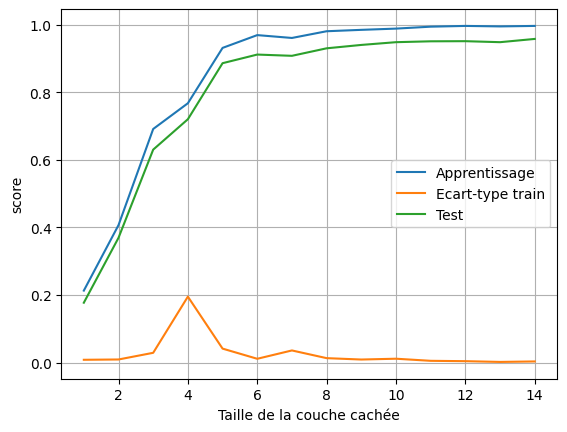

In [100]:
plt.grid()
plt.plot(C,moyen_train,label='Apprentissage')
plt.plot(C,ecartype_train,label='Ecart-type train')
plt.plot(C,moyen_test,label='Test')
plt.xlabel("Taille de la couche cachée")
plt.ylabel("score")
plt.legend()

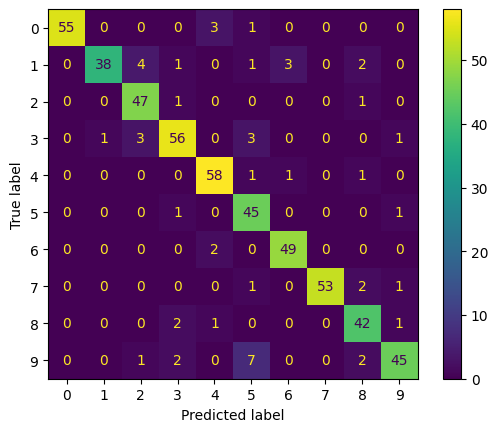

In [309]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,clf1.predict(X_test)))
disp.plot()
plt.show()

# 3. Cross-validation

# Changer les paramètres du réseau pour séparer la base d’apprentissage précédente en deux sets :
apprentissage (80%) et validation croisée (20% : validation _fraction=0.2)

In [297]:
X2_train, X2_validat, y2_train, y2_validat= train_test_split(X_train,y_train,train_size=80/100,test_size=20/100, random_state=1, shuffle=True) 

Entrainement

In [364]:
C = np.array([1,2,3,4,5,8,10,15,20,25,30,35,40])
train_scores, validation_scores = validation_curve(
        MLPClassifier(activation='tanh', solver='adam', batch_size=1,alpha=0, learning_rate='adaptive',early_stopping=True, validation_fraction=0.2), 
        X2_train, y2_train, param_name="hidden_layer_sizes",param_range=C,scoring="accuracy", n_jobs=2, cv = 10)
 # je calcule les moyenne des 13 scores faits à partir de C
moyen_taux_train = np.mean(train_scores,axis = 1) # axis = 1 parce que mes scores sont sont sur une ligne
moyen_taux_validation = np.mean(validation_scores,axis = 1) # axis = 1 parce que mes scores sont sont sur une ligne

 # je calcule l'ecart-type des 13 scores faits à partir de C
ecartype_taux_train = np.std(train_scores,axis = 1)
ecartype_taux_validation = np.std(validation_scores,axis = 1)


In [365]:
print("moyenne score apprentissage", moyen_taux_train)
print("moyenne score validation", moyen_taux_validation)

moyenne score apprentissage [0.17447856 0.33876265 0.52423825 0.64565504 0.86526341 0.93752689
 0.96273908 0.9809825  0.98651274 0.98872451 0.99049198 0.98938615
 0.99016061]
moyenne score validation [0.1700099  0.32631683 0.47985149 0.60015842 0.81168317 0.88069307
 0.91249505 0.93230693 0.93430693 0.94626733 0.95522772 0.95622772
 0.94922772]


Affichage de la courbe

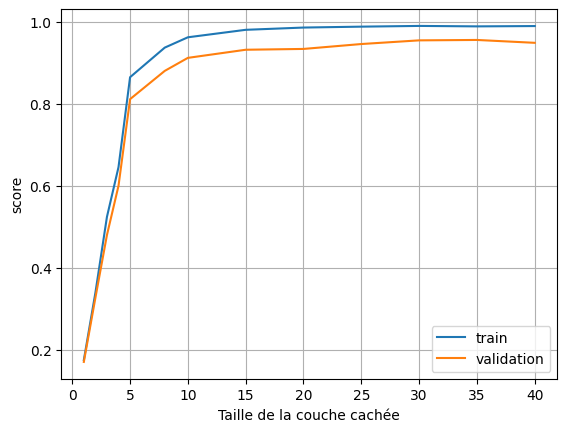

In [366]:
plt.grid()
plt.plot(C,moyen_taux_train, label='train')
plt.plot(C,moyen_taux_validation,label='validation')
plt.ylabel('score')
plt.xlabel('Taille de la couche cachée')
plt.legend()

matrice de confusion

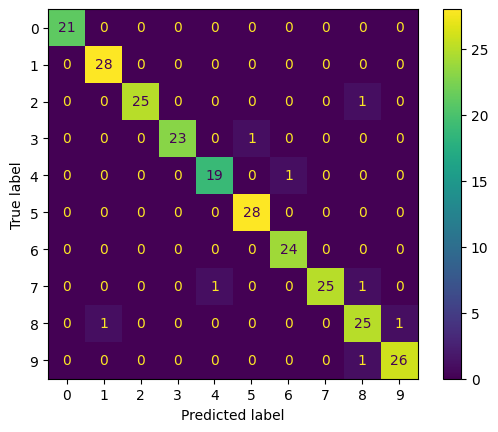

In [368]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y2_validat,clf1.predict(X2_validat)))
disp.plot()
plt.show()

K_plus_proches voisins

In [332]:
score_optimal = 0
k_optimal= None
for k in range(1,25):
    clf2 = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    # j'entraîne le classificateur KNN sur l'ensemble d'apprentissage
    clf2.fit(X2_train, y2_train)
     # j'evalue la performance du classificateur sur l'ensemble de validation
    y_pred = clf2.predict(X2_validat)
    score = accuracy_score(y2_validat, y_pred)
    
    if score > score_optimal:
        score_optimal = score
        k_optimal= k
print(k_optimal)

1


In [333]:
# l'ensemble complet d'apprentissage avec la meilleure valeur de k
clf2_final = KNeighborsClassifier(n_neighbors=k_optimal)
clf2_final.fit(X2_train, y2_train)

# Évaluation sur l'ensemble de test
y_pred = clf2_final.predict(X_test)
test_score = accuracy_score(y_test, y_pred)

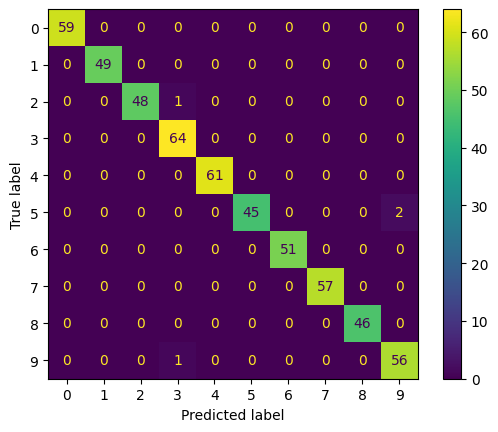

In [334]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,clf2_final.predict(X_test)))
disp.plot()
plt.show()

# 4. Rejet

In [213]:
def argmax_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_masked = np.ma.array(y_argmax, mask=(np.amax(y, axis=1) < threshold))

    return y_masked.filled(-1)

def argmax_top2_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_top2 = np.sort(y, axis=1)[:,-1:-3:-1]
    y_masked = np.ma.array(y_argmax, mask=((y_top2[:,0] - y_top2[:,1]) < threshold))

    return y_masked.filled(-1)

calcul du 

In [370]:
prob_clf2 = clf2_final.predict_proba(X2_validat)
prob_clf1 = clf1.predict_proba(X_test)
reject_threshold = np.arange(0, 1, 0.01)
# j'initialise les compteurs pour le taux de rejet et le taux de reconnaissance
rejet = np.zeros(len(reject_threshold))
taux_reconnaissance = np.zeros(len(reject_threshold))
rejet2 = np.zeros(len(reject_threshold))
taux_reconnaissance2 = np.zeros(len(reject_threshold))
echatillon2 = len(X2_validat)
echatillon = len(X_test)

#   le taux de rejet et le taux de reconnaissance
for i, j in enumerate(reject_threshold): 
    
    #===============================  1 er cas =========================
    
    y_rejet = argmax_reject_threshold(prob_clf1, j)
    rejet[i] = np.sum(y_rejet == -1)
    taux_rejet= rejet / echatillon
    y_pred = np.argmax(prob_clf1, axis=1)
    #le taux de reconnaissance
    taux_reconnaissance[i] = ((y_pred != -1) & (y_pred == np.argmax(y2_validat))).sum() / len(y_pred)
    
    #=================================  2 em cas =======================
    y2_rejet = argmax_reject_threshold(prob_clf2, j)
    # le taux de rejet
    rejet2[i] = np.sum(y2_rejet == -1)
    taux_reject2 = rejet2 / echatillon2
    # les prédictions sans seuil de rejet
    y2_pred = np.argmax(prob_clf2, axis=1)
    # le taux de reconnaissance
    taux_reconnaissance2[i] = ((y2_pred != -1) & (y2_pred == np.argmax(y2_validat))).sum() / len(y2_pred)

# Affichez les résultat
print('Taux de reconnaissance1 :', taux_reconnaissance)
print('Taux de rejet :', taux_rejet)
print('Taux de reconnaissance2 :', taux_reconnaissance2)
print('Taux de rejet :', taux_rejet2)


Taux de reconnaissance : [0.10925926 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926
 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926
 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926
 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926
 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926
 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926
 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926
 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926
 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926
 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926
 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926
 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926
 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926
 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926 0.10925926
 0.10925926 0.10925926 0.10925926 0.1

tracé de la courbe

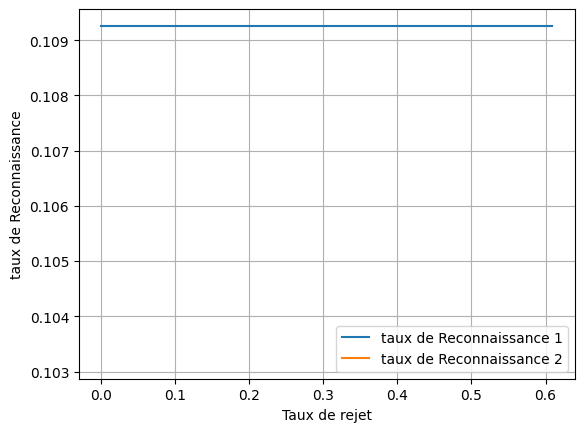

In [375]:
plt.grid()
plt.plot(taux_rejet,taux_reconnaissance, label='taux de Reconnaissance 1')
plt.plot( taux_rejet2,taux_reconnaissance2,label='taux de Reconnaissance 2')
plt.ylabel('taux de Reconnaissance')
plt.xlabel('Taux de rejet')
plt.legend()

# 5. Cascade de classifieurs

Utiliser l'algorithme des k-ppv pour classer les exemples rejetés. Calculer le taux d'erreur global de la
cascade de classifieurs constituée de deux étages.